## student details:

## Rishi Sankhla - 33724434 
## Antony Sebastian - 33771256 (Team leader)

In [1]:
#importing the necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import ElasticNet
%matplotlib inline

#### Read the data from the CSV file into a pandas dataframe

In [2]:
our_data1=pd.read_csv('datcw_na.csv')

In [3]:
#Make copies of the dataframe for later use.
our_data2=our_data1
our_data4=our_data1
our_data1.shape

(768, 10)

#### Rename columns to improve legibility before displaying the dataframe

In [4]:
our_data1.rename({   
    'X0': 'Category_Building', 
    'X1': 'Relative_Compactness', 
    'X2': 'Surface_Area',
    'X3': 'Wall_Area',
    'X4': 'Roof_Area',
    'X5': 'Overall_Height',
    'X6': 'Orientation',
    'X7': 'Glazing_Area',
    'X8': 'Glazing_Area_Distribution',
    'Y': 'Heating_Load'
    }, 
    axis=1, 
    inplace=True )   

#### The sklearnlearn.model module is used to split the dataset into training and testing data in the ratio 0.7:0.3 to see how well the model predicts to unseen data.

In [5]:
#spliting the data for training
train_set, test_set = train_test_split(our_data1, test_size=0.3, random_state=42)

#Making copies for later use
our_data1=train_set
our_data2_copy2=train_set

In [6]:
#Check size of train set and test set after splitting

#train set
print("Rows in train set:",train_set.shape[0])
print("\nColumns in train set:",train_set.shape[1])

#test set
print("\nRows in test set:",test_set.shape[0])
print("\nRows in test set:",test_set.shape[1])

Rows in train set: 537

Columns in train set: 10

Rows in test set: 231

Rows in test set: 10


In [7]:
#Display first 5 rows of the dataframe
our_data1.head()

,Category_Building,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load
334,C3,0.61,800.42,363.82,242.55,2.84,3.96,0.24,0.99,15.08
139,C3,0.63,705.60,339.57,198.45,3.85,6.05,0.10,1.98,15.19
485,C2,0.99,557.86,315.32,110.25,6.30,3.30,0.28,5.00,32.31
547,C1,0.71,630.63,339.57,119.07,7.70,6.05,0.36,0.99,41.67
18,C2,0.71,630.63,377.30,119.07,5.67,3.60,0.00,0.00,29.63


#### Displaying the structure, metadata, datatypes and null values contained in the dataframe

In [8]:
our_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537 entries, 334 to 102
Data columns (total 10 columns):
Category_Building            537 non-null object
Relative_Compactness         537 non-null float64
Surface_Area                 537 non-null float64
Wall_Area                    511 non-null float64
Roof_Area                    537 non-null float64
Overall_Height               537 non-null float64
Orientation                  537 non-null float64
Glazing_Area                 537 non-null float64
Glazing_Area_Distribution    537 non-null float64
Heating_Load                 537 non-null float64
dtypes: float64(9), object(1)
memory usage: 46.1+ KB


In [9]:
#Use the describe() function to obtain a statistical summary of our dataframe
our_data1.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load
count,537.000000,537.000000,511.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000
mean,0.761806,669.495810,320.160098,177.796406,5.179926,3.527821,0.239311,2.848101,22.050503
std,0.146890,122.359229,60.167249,50.215063,1.857254,1.210050,0.140703,1.598785,10.088187
min,0.500000,416.740000,198.450000,89.310000,2.840000,1.620000,0.000000,0.000000,6.010000
25%,0.640000,582.120000,277.830000,132.300000,3.470000,2.430000,0.100000,1.620000,12.960000
50%,0.750000,661.500000,315.320000,178.600000,4.240000,3.600000,0.250000,2.970000,17.230000
75%,0.860000,751.900000,355.740000,218.300000,6.930000,4.400000,0.360000,3.960000,31.280000
max,1.190000,978.290000,503.970000,266.800000,8.470000,6.050000,0.480000,6.050000,43.100000


#### Using a heatmap to give a visual representation of the missing values in our test dataset. From the heatmap below it is evident that the mssing values are all contained within the Wall_Area column.

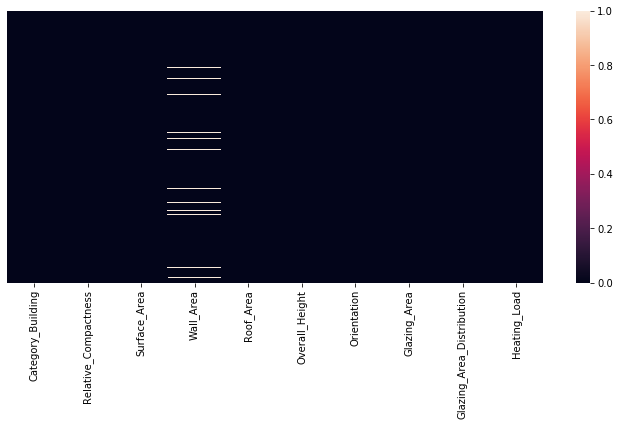

Category_Building             0
Relative_Compactness          0
Surface_Area                  0
Wall_Area                    26
Roof_Area                     0
Overall_Height                0
Orientation                   0
Glazing_Area                  0
Glazing_Area_Distribution     0
Heating_Load                  0
dtype: int64

In [10]:
plt.figure(figsize=(12,5))
sns.heatmap(our_data1.isnull(),yticklabels=False)
plt.show()

#Display sum of all missing values
our_data1.isnull().sum()

#### Using the simple imputer class from the sklearn.impute library to fill-in all the missing values in the dataframe with median values.

In [11]:
imputer = SimpleImputer(strategy="median")

In [12]:
#Dropping Category_Building from out dataset before imputing the mising values with median values.
our_data1=our_data1.drop("Category_Building", axis=1)

#Copy of our_data1 is made - our_data5 is being made to use later while implementing the pipeline 
our_data5=our_data1
imputer.fit(our_data1)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [13]:
our_data1.median().values

array([7.5000e-01, 6.6150e+02, 3.1532e+02, 1.7860e+02, 4.2400e+00,
       3.6000e+00, 2.5000e-01, 2.9700e+00, 1.7230e+01])

In [14]:
#display the strategy used to fill-in the missing values
imputer.strategy

'median'

In [15]:
#Replacing missing values with median values
X = imputer.transform(our_data1)

In [16]:
#Including the replaced median values into our dataframe
our_data1 = pd.DataFrame(X, columns=our_data1.columns,
                          index=our_data1.index)

#### As can be clearly seen from the heatmap, now there are no missing values in our dataset

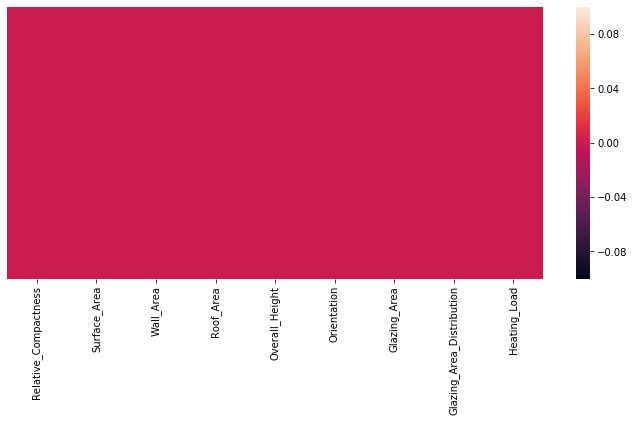

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
dtype: int64

In [17]:
#Heatmap to check for any missing values after using imputer function to fill with median values
plt.figure(figsize=(12,5))
sns.heatmap(our_data1.isnull(),yticklabels=False)
plt.show()

#Display sum of all missing values in the dataset
our_data1.isnull().sum()

In [18]:
#concat dataframes to include the category_building back into the dataframe
our_data1=pd.concat([our_data2_copy2['Category_Building'], our_data1], axis=1)

C1    170
C3    190
C2    177
Name: Category_Building, dtype: int64


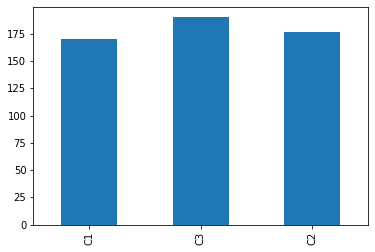

In [19]:
#Data representation of the data contained within the Category_Building column in the form of a histogram and
#displaying a count of any repeat variable(categorical data) that may be present to better understand the dataset.
print(pd.Series(our_data1['Category_Building']).value_counts(sort=False))
pd.Series(our_data1['Category_Building']).value_counts(sort=False).plot(kind='bar')
plt.show()

#### Using OneHotEncoder to convert the categorical data within Category_Building into nurmerical data for use later in the model so that it can be used to train the model

In [20]:
our_encoder = OneHotEncoder(sparse=False)
our_data3 = our_encoder.fit_transform(our_data2_copy2[['Category_Building']])
our_data3 = pd.DataFrame(our_data3,columns=['C1','C2','C3'])
our_data3

,C1,C2,C3
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,0.0,1.0,0.0
...,...,...,...
532,0.0,1.0,0.0
533,0.0,1.0,0.0
534,0.0,1.0,0.0
535,0.0,1.0,0.0


In [21]:
#Concatenate dataframes to include the encoded numerical data from Category_Building
our_data1=pd.concat([our_data3, our_data1], axis=1)
our_data1=our_data1.drop(['Category_Building'],axis=1)

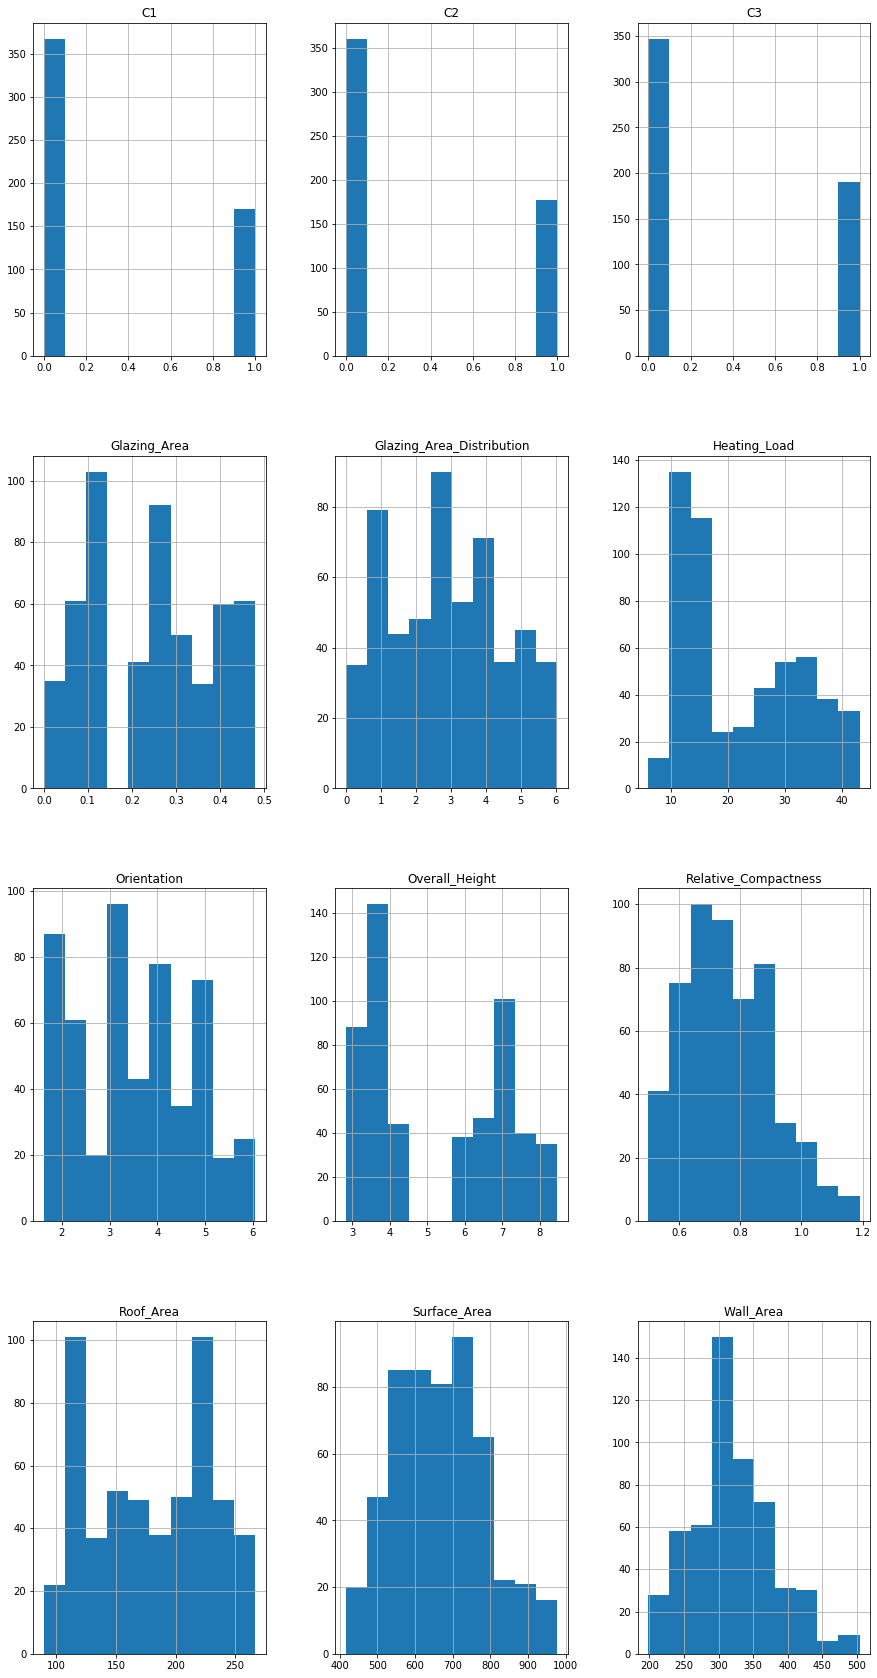

In [22]:
#Make histrograms to inspect the dataset and check for any skewness in the dataset.
our_data1.hist(figsize=(15, 30))
plt.show()

By looking at the histograms above we can say with confidence that there is no need to transform the data any further as the data does not seemed to be skewed as it is not tail-heavy, hence we don't need to remove anymore values or transform the data any further.

C:\Users\rishy\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\rishy\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


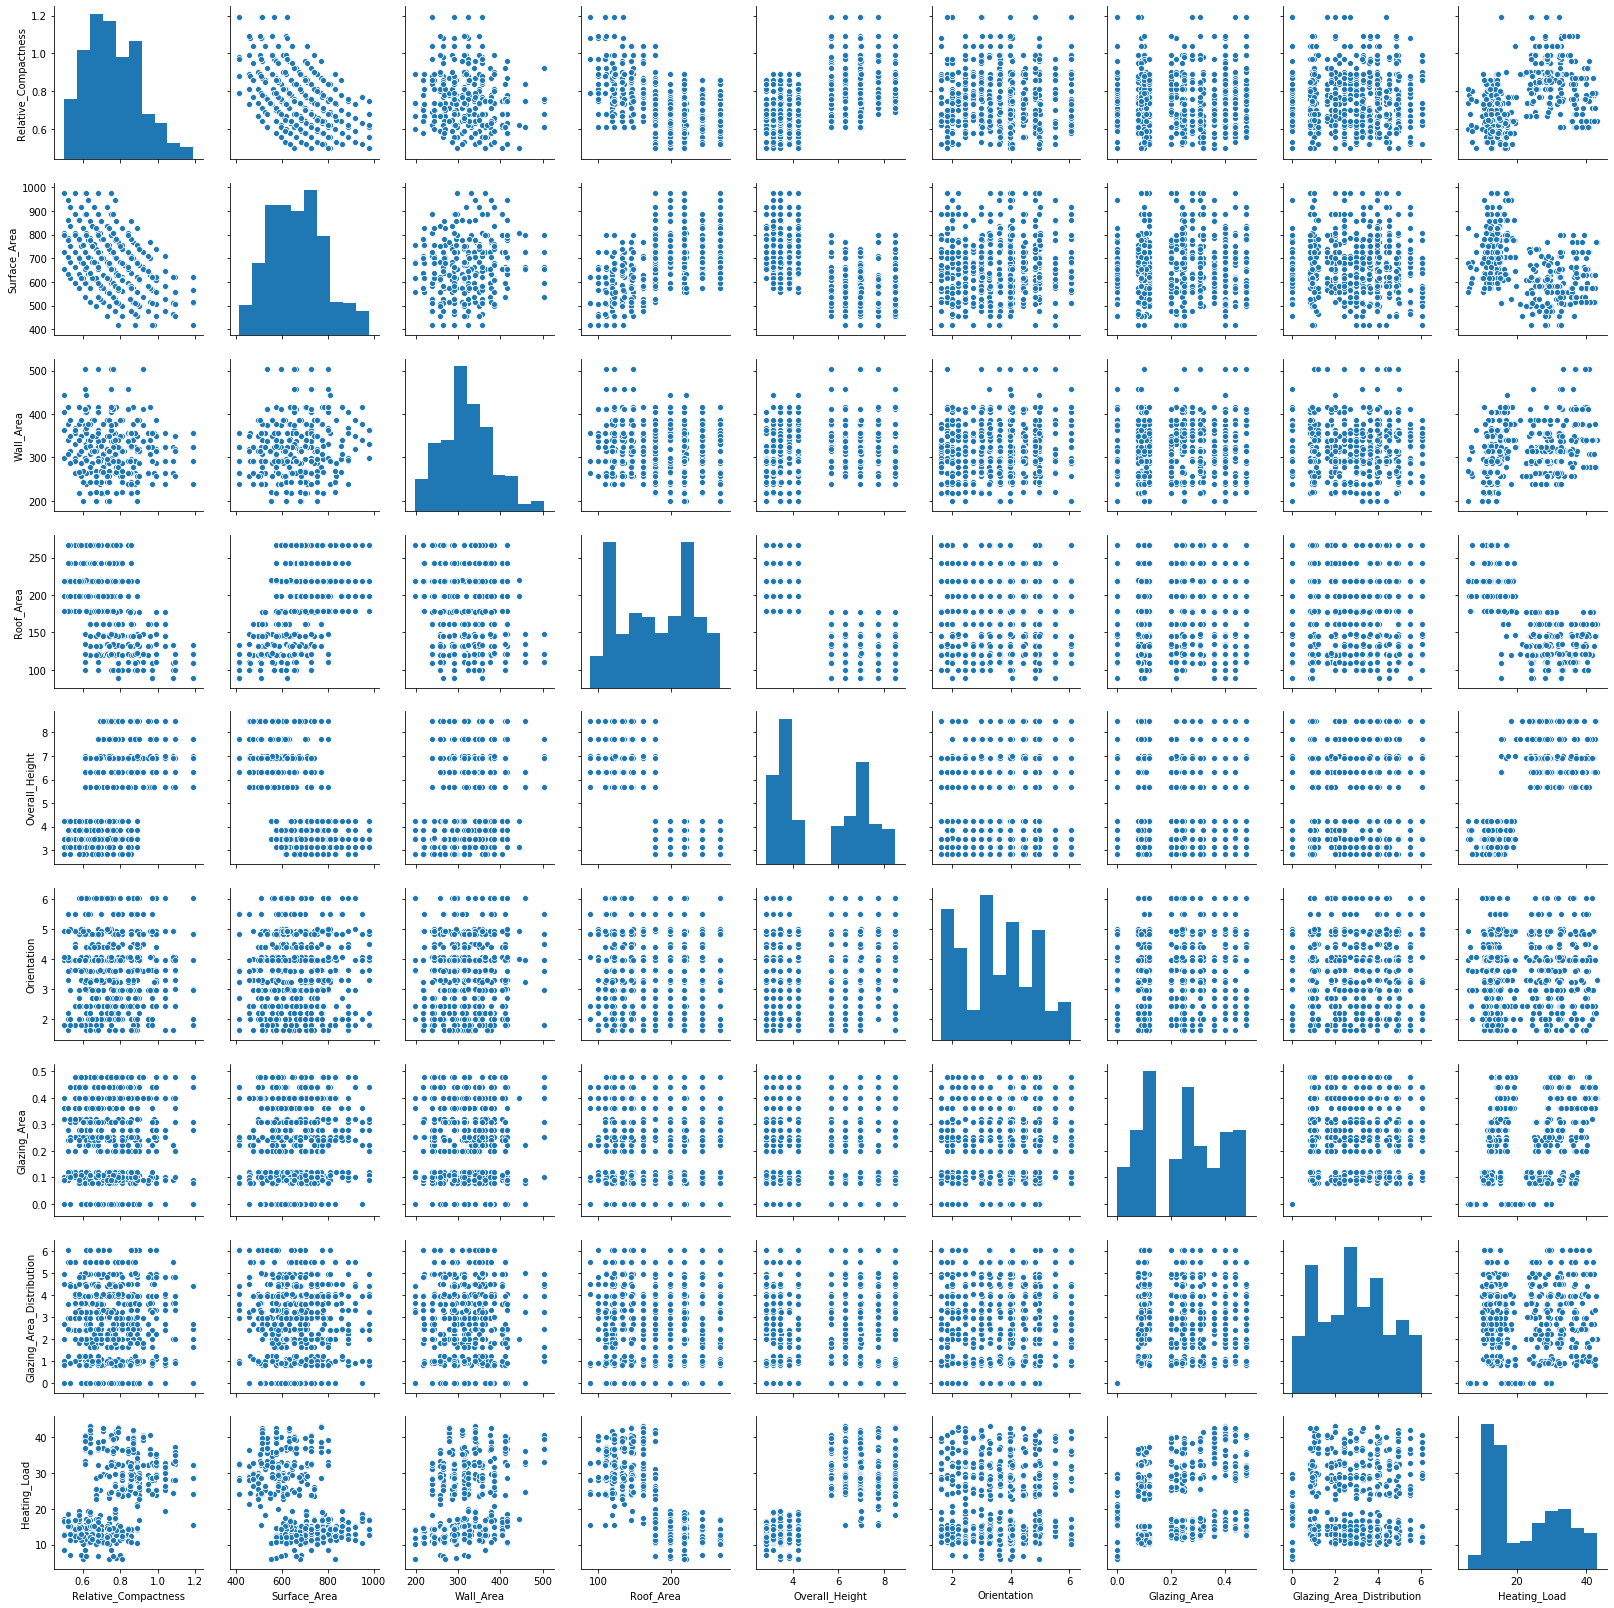

In [23]:
#Pairplot for the train set.
sns.pairplot(train_set)
#This plot enables us to visualize the relationship between any two variables in the dataframe at a time 
#with the use of multiple grid-style scatter plots.

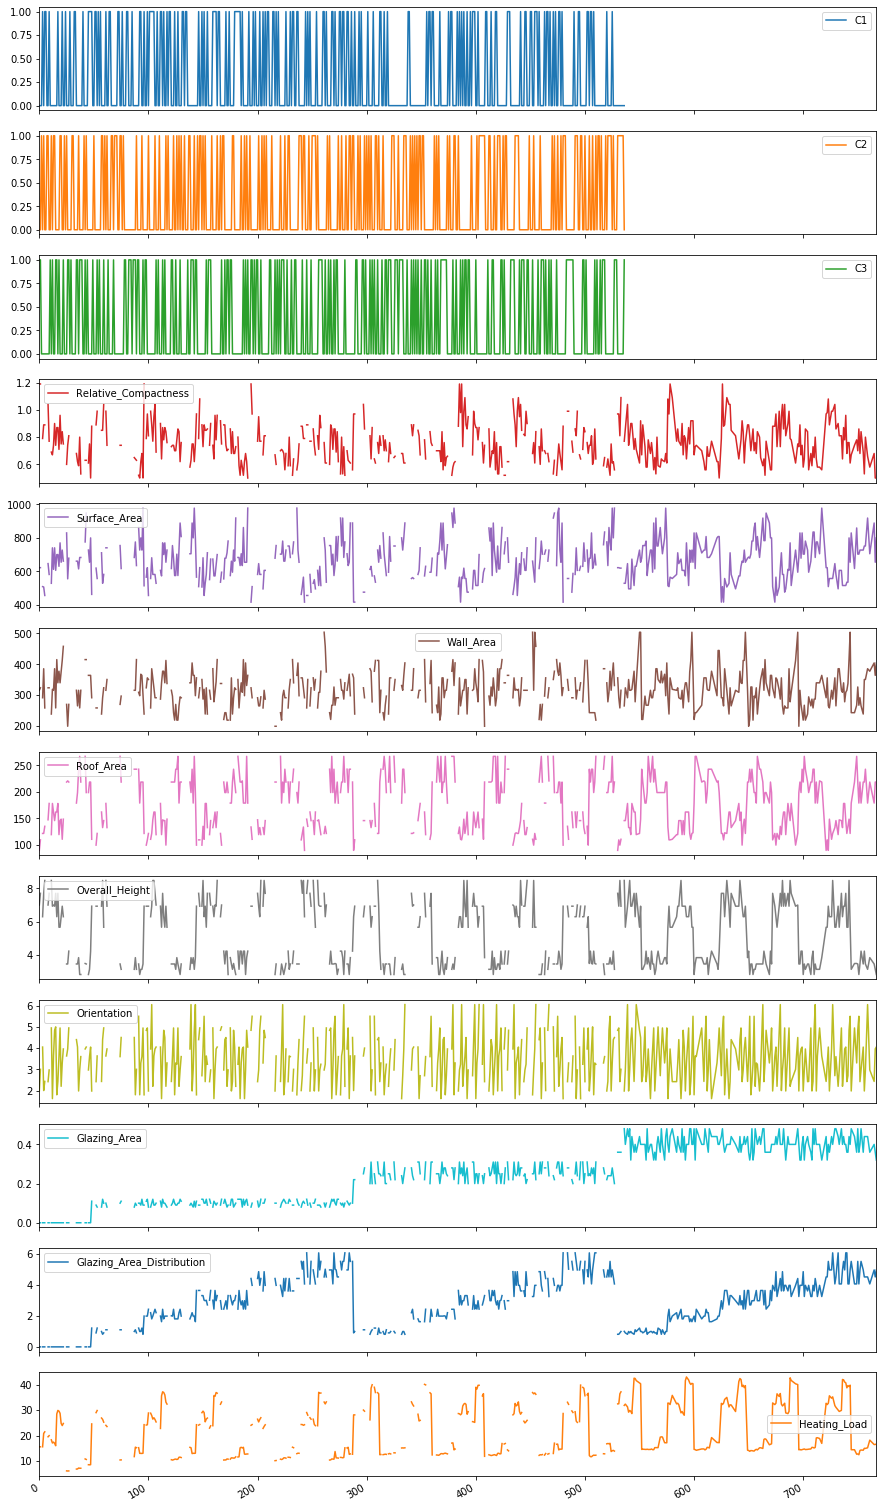

In [24]:
our_data1.plot.line(subplots=True,figsize=(15, 30))
plt.show()

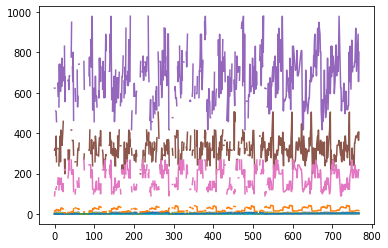

In [25]:
#Plot without scaled features
df=our_data1
plt.plot(df)
plt.show()

#### Performing feature scaling using the standardScalar class to standardise all the values in the dataframe. This is an essential step to be performed before in prepocessing before inputing data into the machine learning model.

In [26]:
scaler = StandardScaler()
scaler.fit(df) 
scaled_features = scaler.transform(df)

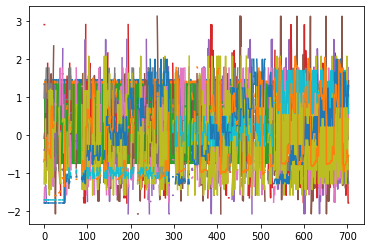

In [27]:
#Make a line plot visualization of the scaled values
plt.plot(scaled_features)
plt.show()

In [28]:
#Display dataframe after scaling
df_feat = pd.DataFrame(scaled_features,columns=df.columns)
#scaled dataframe
df_feat.head()

,C1,C2,C3,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load
0,-0.680599,-0.701189,1.351413,2.917775,-0.384030,-0.078537,-1.763792,0.980895,-1.280331,-1.702404,-1.783076,-0.644969
1,-0.680599,-0.701189,1.351413,2.917775,-0.384030,0.059243,-1.368323,1.358147,-0.436605,-1.702404,-1.783076,-0.644969
2,-0.680599,1.426148,-0.739967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.469294,-0.701189,-0.739967,0.192116,-1.309955,-0.492217,-1.126537,0.603643,0.431937,-1.702404,-1.783076,-0.644969
4,-0.680599,1.426148,-0.739967,0.873531,-1.328034,1.116292,-1.126537,1.358147,-1.263788,-1.702404,-1.783076,-0.120104


#### Plotting a heatmap to visualize a colour coded matrix which shows the correlation between any 2 variables in the dataframe.The darker the colour and the closer that value is to 1 - the higher the correlation between the 2 variables.

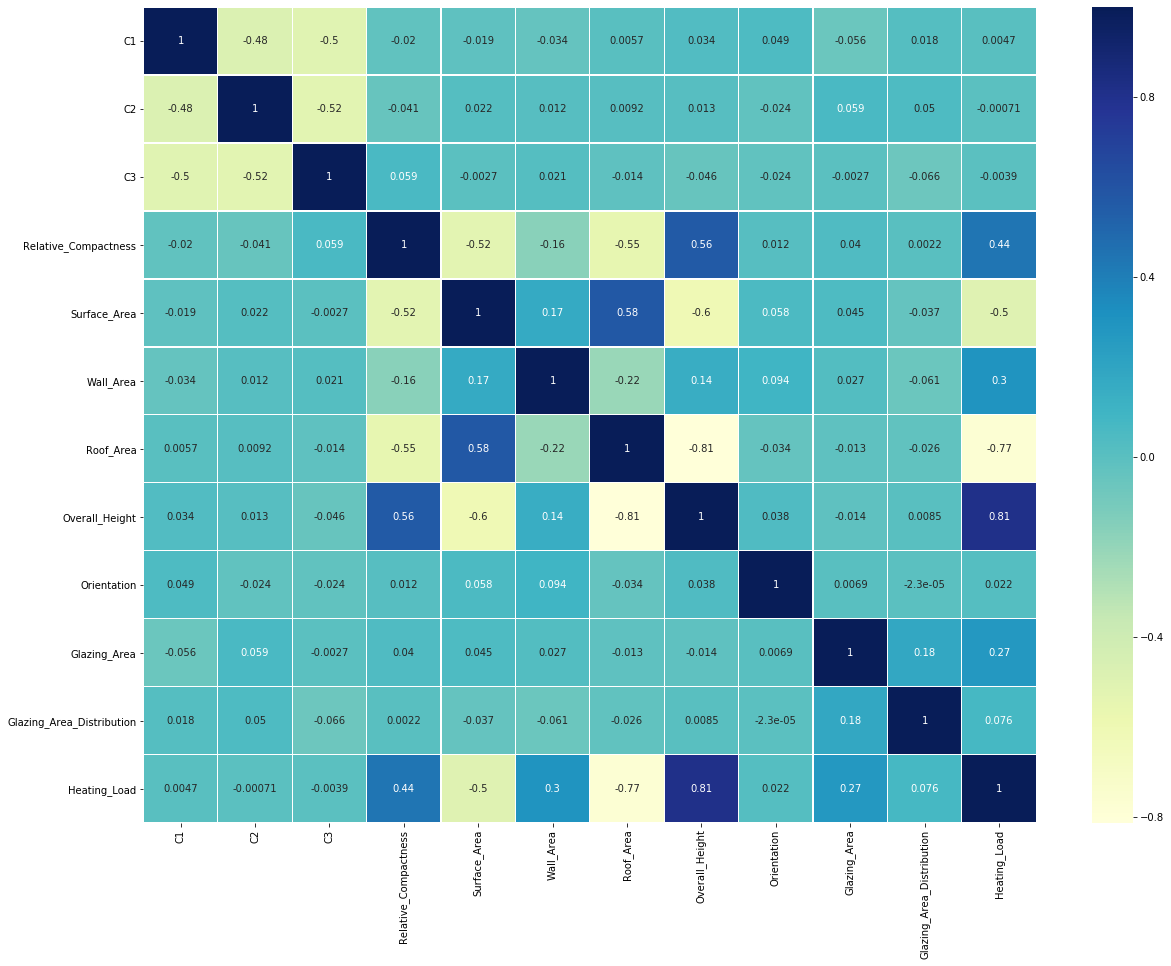

In [29]:
plt.figure(figsize = (20,15))
ax = sns.heatmap(df_feat.corr(), cmap ="YlGnBu", linewidths = 0.30, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
degrees = 0
plt.yticks(rotation=degrees)
plt.show()

From the heatmap above we can see a high degree of correaltion between Heating_Load - Overall_Height(0.81) and Heating_Load - Roof_Area(0.77).

In [30]:
df=df_feat

In [31]:
#display the correlation matrix of the scaled dataframe
corrMatx = df.corr()
corrMatx

,C1,C2,C3,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load
C1,1.000000,-0.477229,-0.503621,-0.020058,-0.019401,-0.033994,0.005675,0.033737,0.048899,-0.056205,0.018416,0.004721
C2,-0.477229,1.000000,-0.518857,-0.041192,0.022163,0.012273,0.009185,0.013204,-0.023739,0.059003,0.049560,-0.000711
C3,-0.503621,-0.518857,1.000000,0.059394,-0.002678,0.021062,-0.014409,-0.045518,-0.024397,-0.002713,-0.065916,-0.003888
Relative_Compactness,-0.020058,-0.041192,0.059394,1.000000,-0.523562,-0.162474,-0.550378,0.564794,0.012043,0.039652,0.002218,0.444701
Surface_Area,-0.019401,0.022163,-0.002678,-0.523562,1.000000,0.166717,0.578806,-0.600647,0.058195,0.045011,-0.037462,-0.499603
Wall_Area,-0.033994,0.012273,0.021062,-0.162474,0.166717,1.000000,-0.217782,0.143713,0.093856,0.027325,-0.061346,0.303034
Roof_Area,0.005675,0.009185,-0.014409,-0.550378,0.578806,-0.217782,1.000000,-0.812518,-0.034108,-0.013209,-0.025993,-0.774212
Overall_Height,0.033737,0.013204,-0.045518,0.564794,-0.600647,0.143713,-0.812518,1.000000,0.037864,-0.013994,0.008482,0.809140
Orientation,0.048899,-0.023739,-0.024397,0.012043,0.058195,0.093856,-0.034108,0.037864,1.000000,0.006864,-0.000023,0.021983
Glazing_Area,-0.056205,0.059003,-0.002713,0.039652,0.045011,0.027325,-0.013209,-0.013994,0.006864,1.000000,0.180052,0.273489


#### Building the pipeline using the pipeline object and performing necessary transformations:
- Simple imputer class used to find median and fill-in missing values.
- Perform standard scaling on the dataset

In [32]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        
        ('std_scaler', StandardScaler()),
    ])

#Using our_data5 - copied from our_data1 before any catgorical transformations were made.
num_pipeline_df = num_pipeline.fit_transform(our_data5)

#### Column transformer objects are initialised to transform the data inside the column Category_Building. The categorical features are transformed using the OneHotEncoder() and numerical features using num_pipeline.

In [33]:
num_attribs = list(our_data5)
cat_attribs = ["Category_Building"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

full_pipeline = full_pipeline.fit_transform(our_data2)

print("Transformed Data:",full_pipeline)

Transformed Data: [[ 2.90130707 -0.36609793 -0.09313024 ...  0.          0.
   1.        ]
 [ 2.90130707 -0.36609793  0.04415196 ...  1.          0.
   0.        ]
 [ 0.79242514 -1.68663034 -0.50531663 ...  1.          0.
   0.        ]
 ...
 [-0.56814385  1.84279265  1.41782342 ...  1.          0.
   0.        ]
 [-1.79265593 -0.09843139  0.73090274 ...  0.          0.
   1.        ]
 [-1.79265593  1.10652339  1.41782342 ...  0.          0.
   1.        ]]


In [34]:
#Making dataframe df2 from transformed data stored in full_pipeline
df2=pd.DataFrame(full_pipeline,columns=['X1','X2','X3','X4','X5','X6','X7','X8','Y','C1','C2','C3']) 

In [35]:
df=df2
#Grouping values to create a train and test split.
x=df[['X1','X2','X3','X4','X5','X6','X7','X8','C1','C2','C3']]
y=df[['Y']]

#### Training and Tesing Split

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30,random_state = 42)

print("Shape of train set:","\nx_train:",x_train.shape,"\ny_train:",y_train.shape)
print("\nShape of test set:","\nx_test:",x_test.shape,"\ny_test:",y_test.shape)

Shape of train set: 
x_train: (537, 11) 
y_train: (537, 1)

Shape of test set: 
x_test: (231, 11) 
y_test: (231, 1)


#### Linear Regression Train

In [37]:
#Fit the model and predict using linear regression
pipe = Pipeline([('linearregression', LinearRegression())])
pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)

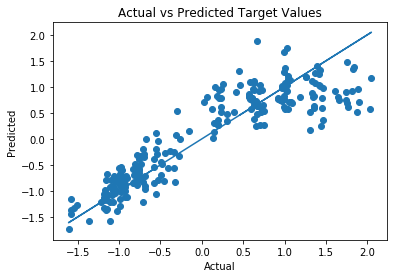

In [38]:
#Scatter Plot
plt.scatter(y_test, y_pred)
plt.plot(y_test,y_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Target Values')
plt.show()


In [39]:
#printing the model score, MSE ans RMSE scores
print('Model score = ',pipe.score(x_test, y_test))
print('Mean Squared Error = ',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error = ',np.sqrt(mean_squared_error(y_test,y_pred)))

Model score =  0.8110633505960841
Mean Squared Error =  0.18841142057185004
Root Mean Squared Error =  0.43406384388917957


In [40]:
#Printing the MAE of the model
lin_mae = mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error of the Linear Regression Model:",lin_mae)

Mean Absolute Error of the Linear Regression Model: 0.322800017766519


In [41]:
#Function to display (error) scores in a CV, on all test folds, and their average and standard deviation

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [42]:
##Applying 10 fold cross-validation(cv=10) to model 
_scores = cross_val_score(pipe, x_train, y_train,
                             n_jobs=-1, scoring="neg_mean_squared_error", cv=10)

#and displaying the mean and std deviation using the display function created above
display_scores(np.sqrt(-_scores))

Scores: [0.45624225 0.42192789 0.49514994 0.45431254 0.48786861 0.43003311
 0.4796561  0.50329458 0.50168223 0.34632496]
Mean: 0.4576492219959379
Standard deviation: 0.0461205930853391


#### Polynomial Regression with Ridge Regularization

In [43]:
# Define the degree of the polynomial
degree = 9

# Create a pipeline with polynomial features and Ridge regression with L2 regularization
model = make_pipeline(PolynomialFeatures(degree, include_bias=False), Ridge(alpha=0.1))

In [44]:
# Train the model on the training data
model.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=9, include_bias=False,
                                    interaction_only=False, order='C')),
                ('ridge',
                 Ridge(alpha=0.1, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [45]:
# Make predictions on the testing data
y_pred = model.predict(x_test)
print("Predictions on the test data:\n",y_pred)

Predictions on the test data:
 [[ 1.18929231e+00]
 [-6.43582755e-01]
 [ 1.41153719e+00]
 [ 5.68870375e-01]
 [-1.37291473e+00]
 [-1.46382553e-01]
 [-1.49308435e+00]
 [ 2.00838152e+00]
 [-3.71607407e+00]
 [ 1.25525507e+00]
 [-1.31547446e+01]
 [-1.23171575e+01]
 [ 7.28849718e-01]
 [-2.78518893e+00]
 [-7.10849145e-01]
 [-9.72633020e-02]
 [ 2.26074093e+00]
 [-2.99673355e+00]
 [-6.20778743e-01]
 [ 1.98176073e+00]
 [ 1.90453048e+00]
 [ 1.17544408e+00]
 [-1.31058624e+00]
 [-2.22603863e-01]
 [-1.94007611e+00]
 [ 6.70271619e-02]
 [ 3.36991774e+00]
 [ 3.84998897e-01]
 [-1.65770142e+00]
 [-1.30656110e+00]
 [ 4.22691268e-02]
 [ 1.04096444e+00]
 [-1.35251840e+00]
 [ 4.32115037e+00]
 [ 1.16460409e+00]
 [ 4.36271272e+00]
 [-4.32063514e+00]
 [ 1.43602079e+00]
 [ 2.33927815e+00]
 [-7.23318964e-01]
 [ 3.23553053e+00]
 [-1.32256156e+00]
 [-4.99981853e+00]
 [ 3.34150578e+00]
 [-1.33571276e+00]
 [-3.81495875e+00]
 [-9.27827814e-01]
 [-1.97503549e+00]
 [ 4.98656751e-01]
 [ 7.40785804e-01]
 [ 1.60012980e+00]


In [46]:
#Applying 10 fold cross-validation(cv=10) to model 
_scores = cross_val_score(model, x_train, y_train,
                             n_jobs=-1, scoring="neg_mean_squared_error", cv=10)

#and displaying the mean and std deviation using the display function created above
display_scores(np.sqrt(-_scores))

Scores: [ 8.11676276  9.9725926   7.48794817  4.73711779  4.6524032  12.30155405
  2.4286759   4.81116119  7.82664203  5.52357071]
Mean: 6.785842840825251
Standard deviation: 2.777632952783714


In [47]:
#Building the pipeline for both polynomial and linear regression.
pipeline = Pipeline([
    ("poly", PolynomialFeatures()),
    ("lin_reg", LinearRegression())
])

#Define a range of hyperparameters to search over
param_grid = {
    "poly__degree": [1, 2, 3, 4, 5, 6],
    "lin_reg__fit_intercept": [True, False],
    "lin_reg__normalize": [True, False],
          'lin_reg__copy_X': [True, False],
         'lin_reg__n_jobs': [1, 2, 4]
}

#Use grid search to find the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:  3.0min finished
C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('poly',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('lin_reg',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
                                                         normalize=False))],
                                verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'lin_reg__copy_X': [True, False],
                         'lin_reg__fit_intercept': [True, False

In [48]:
# Print the best hyperparameters and corresponding mean squared error
print("Best hyperparameters: ", grid_search.best_params_)
print("Best mean squared error: ", abs(grid_search.best_score_))

#finding best using gridsearch estimator
best_model = grid_search.best_estimator_
print(best_model)

#predicting the Y variables
y_pred = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)

#printing the MSE and grid search dataframe
print("Test set mean squared error: ", mse)
pd.DataFrame(grid_search.cv_results_)

Best hyperparameters:  {'lin_reg__copy_X': True, 'lin_reg__fit_intercept': True, 'lin_reg__n_jobs': 1, 'lin_reg__normalize': False, 'poly__degree': 2}
Best mean squared error:  0.7995720100453875
Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('lin_reg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1,
                                  normalize=False))],
         verbose=False)
Test set mean squared error:  0.16593333017762535


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_lin_reg__copy_X,param_lin_reg__fit_intercept,param_lin_reg__n_jobs,param_lin_reg__normalize,param_poly__degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008632,0.005875,0.003790,0.000400,True,True,1,True,1,"{'lin_reg__copy_X': True, 'lin_reg__fit_interc...",0.807231,0.798880,0.789034,0.767389,0.769143,0.786398,0.015853,25
1,0.010371,0.004826,0.003590,0.000489,True,True,1,True,2,"{'lin_reg__copy_X': True, 'lin_reg__fit_interc...",0.823798,0.813063,0.819011,0.788074,0.752700,0.799400,0.026344,19
2,0.035705,0.000744,0.010172,0.001596,True,True,1,True,3,"{'lin_reg__copy_X': True, 'lin_reg__fit_interc...",0.628661,0.732000,0.545487,0.677097,0.535320,0.623924,0.075546,49
3,0.091954,0.008038,0.024734,0.004250,True,True,1,True,4,"{'lin_reg__copy_X': True, 'lin_reg__fit_interc...",-0.787043,-0.583957,-2.863458,-0.064166,-0.923247,-1.043038,0.953765,103
4,0.281448,0.039192,0.086369,0.010259,True,True,1,True,5,"{'lin_reg__copy_X': True, 'lin_reg__fit_interc...",0.172774,0.221672,-0.037394,0.245618,0.049836,0.130750,0.107633,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,0.007581,0.001353,0.004209,0.000977,False,False,4,False,2,"{'lin_reg__copy_X': False, 'lin_reg__fit_inter...",0.823751,0.813372,0.819279,0.787833,0.753096,0.799537,0.026289,7
140,0.026914,0.001410,0.010372,0.001017,False,False,4,False,3,"{'lin_reg__copy_X': False, 'lin_reg__fit_inter...",0.626672,0.721384,0.543892,0.677057,0.534181,0.620836,0.073115,55
141,0.081133,0.006433,0.024188,0.004979,False,False,4,False,4,"{'lin_reg__copy_X': False, 'lin_reg__fit_inter...",-0.820084,-0.873683,-2.874341,-0.028385,-1.168124,-1.151784,0.938313,115
142,0.189857,0.012863,0.066793,0.008178,False,False,4,False,5,"{'lin_reg__copy_X': False, 'lin_reg__fit_inter...",-0.675402,0.074692,-0.533130,0.084684,-0.152353,-0.240525,0.312571,85


#### Ridge regression:

In [49]:
# Regularisation hyperparameter for Ridge is as seen in the lecture:
# alpha - the strength of regularisation.
# Here solver="cholesky" chooses the one of the possible methods to compute the model,
# which is based on a closed-form solution (mathematical formula) based on the so called Cholesky method.

ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(x_train, y_train)
ridge_reg.predict(x_test)

array([[-3.82500702e-01],
       [-7.46617259e-01],
       [ 5.69560133e-01],
       [ 9.50104512e-01],
       [-1.05793767e+00],
       [ 1.27316392e-01],
       [ 3.59278827e-01],
       [ 9.40560317e-01],
       [-3.30734784e-01],
       [ 8.54978456e-01],
       [-2.26141057e-01],
       [ 1.13688877e+00],
       [ 6.52644468e-01],
       [-1.13086823e+00],
       [-8.05385936e-01],
       [ 7.79167125e-01],
       [ 1.00719781e+00],
       [-1.14947722e+00],
       [-3.94935335e-01],
       [ 1.35887227e+00],
       [ 1.08169032e+00],
       [ 7.05785495e-01],
       [-1.03521762e+00],
       [ 2.50219793e-01],
       [-8.96565653e-01],
       [ 8.12142426e-01],
       [ 1.04153894e+00],
       [ 7.21343168e-01],
       [-4.84881809e-01],
       [-6.98587068e-01],
       [-1.31708594e+00],
       [-1.28417999e+00],
       [-7.95288398e-01],
       [ 1.29703594e+00],
       [ 5.99703249e-01],
       [ 1.09343444e+00],
       [ 1.75189374e+00],
       [ 5.85039046e-01],
       [ 1.2

In [50]:
#printing the mean score using cross valisation
_scores = cross_val_score(ridge_reg, x_train, y_train,
                             n_jobs=-1, scoring="neg_mean_squared_error", cv=10)

display_scores(np.sqrt(-_scores))

Scores: [0.4563853  0.42154161 0.49550059 0.45456313 0.4877048  0.43008503
 0.47943415 0.50285262 0.50178535 0.3461871 ]
Mean: 0.45760396775867485
Standard deviation: 0.04615240236582526


In [51]:
param_grid = {
    "alpha": [0.01, 0.1, 1, 10],
    "fit_intercept": [True, False],
    "normalize": [True, False]
}

# Create a Ridge regression model
ridge_reg = Ridge()

# Use grid search to find the best hyperparameters
grid_search = GridSearchCV(ridge_reg, param_grid, cv=5, verbose=1)
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.01, 0.1, 1, 10],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [52]:
# Print the best hyperparameters and corresponding mean squared error
print("Best hyperparameters: ", grid_search.best_params_)
print("Best mean squared error: ", abs(grid_search.best_score_))
best_model = grid_search.best_estimator_
print(best_model)
y_pred = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Test set mean squared error: ", mse)
pd.DataFrame(grid_search.cv_results_)

Best hyperparameters:  {'alpha': 10, 'fit_intercept': False, 'normalize': True}
Best mean squared error:  0.7866459117537274
Ridge(alpha=10, copy_X=True, fit_intercept=False, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)
Test set mean squared error:  0.18970982211469176


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_fit_intercept,param_normalize,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005386,1.352480e-03,0.004002,0.001093,0.01,True,True,"{'alpha': 0.01, 'fit_intercept': True, 'normal...",0.807518,0.797422,0.789285,0.768899,0.769197,0.786524,0.015355,4
1,0.002594,4.884226e-04,0.002007,0.000024,0.01,True,False,"{'alpha': 0.01, 'fit_intercept': True, 'normal...",0.807232,0.798877,0.789035,0.767394,0.769143,0.786398,0.015852,13
2,0.003192,7.465699e-04,0.002393,0.000489,0.01,False,True,"{'alpha': 0.01, 'fit_intercept': False, 'norma...",0.807232,0.798877,0.789035,0.767394,0.769143,0.786398,0.015852,11
3,0.003176,4.078437e-04,0.002393,0.000489,0.01,False,False,"{'alpha': 0.01, 'fit_intercept': False, 'norma...",0.807232,0.798877,0.789035,0.767394,0.769143,0.786398,0.015852,11
4,0.003136,4.597027e-04,0.003169,0.000412,0.1,True,True,"{'alpha': 0.1, 'fit_intercept': True, 'normali...",0.805608,0.784542,0.786047,0.775063,0.766626,0.783620,0.013066,14
5,0.003937,6.406967e-04,0.003590,0.000490,0.1,True,False,"{'alpha': 0.1, 'fit_intercept': True, 'normali...",0.807240,0.798848,0.789042,0.767430,0.769145,0.786403,0.015841,10
6,0.003989,6.293940e-04,0.003007,0.000031,0.1,False,True,"{'alpha': 0.1, 'fit_intercept': False, 'normal...",0.807240,0.798850,0.789042,0.767430,0.769146,0.786404,0.015841,8
7,0.004024,9.012621e-04,0.003745,0.000737,0.1,False,False,"{'alpha': 0.1, 'fit_intercept': False, 'normal...",0.807240,0.798850,0.789042,0.767430,0.769146,0.786404,0.015841,8
8,0.004120,7.832017e-04,0.003013,0.000627,1,True,True,"{'alpha': 1, 'fit_intercept': True, 'normalize...",0.710230,0.669127,0.673075,0.702187,0.696183,0.690158,0.016254,15
9,0.003264,6.332014e-04,0.002394,0.000489,1,True,False,"{'alpha': 1, 'fit_intercept': True, 'normalize...",0.807316,0.798557,0.789103,0.767789,0.769166,0.786448,0.015728,7


In [53]:
#adding the L2 penalty
sgd_reg = SGDRegressor(penalty="l2", alpha=1, random_state=42)
sgd_reg.fit(x_train, y_train)
sgd_reg.predict(x_test)

C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([-0.32861837, -0.58749003,  0.54269958,  0.41132207, -0.71109529,
        0.14440315,  0.49989337,  0.69077023, -0.34603705,  0.73368327,
       -0.25894464,  0.86550982,  0.47735837, -0.72746151, -0.66418816,
        0.51838653,  0.71634784, -0.79438102, -0.30037438,  0.71316705,
        0.7441544 ,  0.44195118, -0.68893793,  0.33736167, -0.51573395,
        0.56583592,  0.73677856,  0.33215829, -0.45242032, -0.38101171,
       -0.79305933, -0.91543787, -0.64448753,  0.84171191,  0.29795181,
        0.83410775,  1.16751055,  0.46122672,  0.78288554, -0.76762947,
        0.6922786 , -0.35478739, -0.93714915,  0.55735333, -0.79475389,
       -0.84440429, -0.79983516, -0.69356597,  0.47845467,  0.46274646,
        0.70118502, -0.82519586, -0.6129362 ,  0.42853225, -0.5801979 ,
       -0.24261448, -0.53113217,  0.42631297,  0.89957677,  0.44790911,
       -0.67285275, -0.59982769, -0.66135315,  0.57338059,  0.82762298,
        0.29591457,  0.16170434, -0.65453247, -0.49543021, -1.04

#### Lasso Regression:

In [54]:
#making the object of Lasso model
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x_train, y_train)
lasso_reg.predict(x_test)

array([-0.55132824, -0.75471363,  0.44996959,  0.7515152 , -0.91682223,
        0.25029088,  0.34783562,  0.72270264, -0.43393322,  0.77107539,
       -0.21846996,  0.84337438,  0.62421717, -0.92758077, -0.77525901,
        0.72218184,  0.83927148, -0.92667739, -0.48890935,  1.18853669,
        0.86611899,  0.49050292, -0.72631087,  0.22660548, -0.90063076,
        0.54228774,  0.78788697,  0.73073258, -0.39556261, -0.78369488,
       -1.1356774 , -1.03326207, -0.73412553,  1.14767551,  0.61011054,
        0.92854532,  1.46975368,  0.63874602,  1.13650754, -0.77258016,
        0.66532501, -0.55135669, -0.8805201 ,  0.61867754, -0.8780497 ,
       -1.14828171, -0.92384797, -0.90106897,  0.69509067,  0.54033458,
        0.92023806, -0.88736628, -0.65157034,  0.56789566, -0.76763733,
       -0.34079343, -0.7471163 ,  0.48316736,  0.99334145,  0.69716833,
       -0.70490727, -0.67919393, -0.46392676,  0.66562976,  0.90508542,
        0.41986483,  0.25899332, -0.89125416, -0.63893864, -1.18

In [55]:
#printing the mean score using cross validation
_scores = cross_val_score(lasso_reg, x_train, y_train,
                             n_jobs=-1, scoring="neg_mean_squared_error", cv=10)

display_scores(np.sqrt(-_scores))

Scores: [0.48621031 0.40239886 0.55536873 0.49181586 0.51752091 0.5144643
 0.48951992 0.50682671 0.54278366 0.34684675]
Mean: 0.4853756018157026
Standard deviation: 0.06055499780105442


In [56]:
#printing the coefficients of Lasso Regression
lasso_reg.coef_

array([ 0.        , -0.        ,  0.07227678, -0.25167442,  0.49810133,
       -0.        ,  0.17465053,  0.        , -0.        , -0.        ,
        0.        ])

In [57]:
#tuning the model using Grid Search CV
param_grid = {
    "alpha": [0.01, 0.1, 1, 10],
    "fit_intercept": [True, False],
    "normalize": [True, False]
}

# Create a Lasso regression model
lasso_reg = Lasso()

# Use grid search to find the best hyperparameters
grid_search = GridSearchCV(lasso_reg, param_grid, cv=5, verbose=1)
grid_search.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.01, 0.1, 1, 10],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [58]:
# Print the best hyperparameters and corresponding mean squared error
print("Best hyperparameters: ", grid_search.best_params_)
print("Best mean squared error: ", abs(grid_search.best_score_))
best_model = grid_search.best_estimator_
print(best_model)
y_pred = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Test set mean squared error: ", mse)
pd.DataFrame(grid_search.cv_results_)

Best hyperparameters:  {'alpha': 0.01, 'fit_intercept': False, 'normalize': True}
Best mean squared error:  0.7868517133633061
Lasso(alpha=0.01, copy_X=True, fit_intercept=False, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Test set mean squared error:  0.18968232625779


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_fit_intercept,param_normalize,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004160,0.000984,0.002765,0.000389,0.01,True,True,"{'alpha': 0.01, 'fit_intercept': True, 'normal...",0.719579,0.647122,0.625741,0.681286,0.687395,0.672266,0.032718,7
1,0.004293,0.000361,0.003924,0.001098,0.01,True,False,"{'alpha': 0.01, 'fit_intercept': True, 'normal...",0.810968,0.794720,0.786023,0.773990,0.764316,0.786066,0.016220,3
2,0.004373,0.000382,0.003462,0.000429,0.01,False,True,"{'alpha': 0.01, 'fit_intercept': False, 'norma...",0.811022,0.796677,0.786040,0.774481,0.765720,0.786852,0.016016,1
3,0.004182,0.000347,0.003195,0.000385,0.01,False,False,"{'alpha': 0.01, 'fit_intercept': False, 'norma...",0.811022,0.796677,0.786040,0.774481,0.765720,0.786852,0.016016,1
4,0.005664,0.000739,0.004113,0.000795,0.1,True,True,"{'alpha': 0.1, 'fit_intercept': True, 'normali...",-0.020120,-0.018107,-0.031493,-0.003138,-0.019892,-0.018552,0.009033,12
5,0.007774,0.001041,0.006021,0.000563,0.1,True,False,"{'alpha': 0.1, 'fit_intercept': True, 'normali...",0.796368,0.751899,0.729577,0.760541,0.746696,0.757080,0.022146,6
6,0.005576,0.002091,0.003829,0.001328,0.1,False,True,"{'alpha': 0.1, 'fit_intercept': False, 'normal...",0.796308,0.754222,0.730556,0.760472,0.747892,0.757955,0.021672,4
7,0.002965,0.000106,0.002153,0.000378,0.1,False,False,"{'alpha': 0.1, 'fit_intercept': False, 'normal...",0.796308,0.754222,0.730556,0.760472,0.747892,0.757955,0.021672,4
8,0.002978,0.000033,0.002389,0.000464,1,True,True,"{'alpha': 1, 'fit_intercept': True, 'normalize...",-0.020120,-0.018107,-0.031493,-0.003138,-0.019892,-0.018552,0.009033,12
9,0.002822,0.000330,0.001988,0.000091,1,True,False,"{'alpha': 1, 'fit_intercept': True, 'normalize...",-0.020120,-0.018107,-0.031493,-0.003138,-0.019892,-0.018552,0.009033,12


In [59]:
# Note on using Lasso for feature selection: 
# For complex datasets with many features, you can check which
# features have a coefficient equal to 0 in the Lasso model. Those features are
# not considered important by the model and so not used since they have a 0 coefficient. 
# The features with non- zero coefficients can be seen as the features selected by the Lasso model.
# Hence Lasso algo is not only used for building a model, but can be used for feature selection too.
# For a dataset which is very large and has many features, or for which you suspect it may have some 
# unuseful features, to prevent a large amount of computation, 
# you can do a feature selection with Lasso (which is cheap to compute), 
# and then use another algo to build a more powerful (possibly more computationally expensive) 
# model on the selected features to reach better predictions. 
# Indeed, this method may eliminate unuseful features, and may make the
# computation amount more feasable.

In [60]:
# Lasso can also be computed iteratively with Stochastic gradient descent algo
# as seen for Ridge above. In this case we use L1 penalty 
# as discussed in lecture (see penalty="l1" in the command). 

sgd_reg = SGDRegressor(penalty="l1", alpha=0.1, random_state=42)
sgd_reg.fit(x_train, y_train)
sgd_reg.predict(x_test)

C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([-5.63122292e-01, -7.69988419e-01,  4.76054059e-01,  7.34630440e-01,
       -9.49184056e-01,  2.61542494e-01,  3.92159750e-01,  7.26604695e-01,
       -4.15493259e-01,  7.73470062e-01, -2.09655665e-01,  8.70847791e-01,
        6.42719627e-01, -9.30602403e-01, -8.11386932e-01,  7.33351155e-01,
        8.53685106e-01, -9.47900769e-01, -5.17517139e-01,  1.19635292e+00,
        8.66824715e-01,  5.02341648e-01, -7.19758400e-01,  2.52658397e-01,
       -9.33903724e-01,  5.42501638e-01,  7.78446024e-01,  7.20325422e-01,
       -4.09095250e-01, -7.88036828e-01, -1.16844363e+00, -1.07006557e+00,
       -7.48003901e-01,  1.12028306e+00,  5.79087841e-01,  9.19271394e-01,
        1.46061605e+00,  6.25189597e-01,  1.14809021e+00, -7.86439657e-01,
        6.74325485e-01, -5.25810437e-01, -8.74961443e-01,  6.17256476e-01,
       -8.91043806e-01, -1.13668444e+00, -9.28867066e-01, -8.68302392e-01,
        7.04475266e-01,  5.80391289e-01,  9.27963018e-01, -9.05393660e-01,
       -6.43082371e-01,  

#### ElasticNet model:

In [61]:
#creating the object of ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(x_train, y_train)
elastic_net.predict(x_test)

array([-0.47772668, -0.74433677,  0.51140867,  0.79391704, -0.9686486 ,
        0.18933645,  0.3894326 ,  0.79845252, -0.36701308,  0.7945425 ,
       -0.17926821,  0.96979089,  0.63024124, -1.02379644, -0.81522751,
        0.74311642,  0.90583768, -1.01990214, -0.45765955,  1.19318429,
        0.92690148,  0.58477316, -0.81430469,  0.24094755, -0.90674355,
        0.6100319 ,  0.88023442,  0.70583452, -0.43870518, -0.70116612,
       -1.20242615, -1.11862108, -0.75145589,  1.19086007,  0.59943462,
        0.99188164,  1.56866663,  0.61109555,  1.16332686, -0.89703712,
        0.6993628 , -0.57477781, -1.05297724,  0.6841945 , -1.032421  ,
       -1.21419494, -1.02509205, -0.96832643,  0.69875267,  0.57689241,
        0.9984444 , -0.98023949, -0.71171077,  0.56176501, -0.80924208,
       -0.32351271, -0.79573376,  0.51087411,  1.12398666,  0.71259587,
       -0.7735794 , -0.666194  , -0.56462472,  0.69824332,  0.9850192 ,
        0.37162007,  0.20540567, -0.92676307, -0.63553979, -1.28

In [62]:
#printing the mean score of ElasticNet using cross validation
_scores = cross_val_score(elastic_net, x_train, y_train,
                             n_jobs=-1, scoring="neg_mean_squared_error", cv=10)

display_scores(np.sqrt(-_scores))

Scores: [0.46792494 0.39900026 0.52827691 0.47301325 0.49645287 0.47156068
 0.48067273 0.48630614 0.52422089 0.34377434]
Mean: 0.46712030028825674
Standard deviation: 0.053218819725236496


In [63]:
#adding the elasticnet penalty
sgd_reg = SGDRegressor(penalty="elasticnet", alpha=0.1, l1_ratio=0.5, random_state=42)
sgd_reg.fit(x_train, y_train)
sgd_reg.predict(x_test)

C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([-0.48075616, -0.74895171,  0.53107663,  0.78063139, -0.99061097,
        0.19287981,  0.42221391,  0.80978673, -0.36046029,  0.8044926 ,
       -0.18345713,  0.99675551,  0.64390485, -1.0290637 , -0.84279394,
        0.74818289,  0.91381958, -1.03726454, -0.46610957,  1.19163157,
        0.92680467,  0.59632399, -0.81612732,  0.25664068, -0.91578715,
        0.62428628,  0.88389729,  0.68728029, -0.45741693, -0.69348931,
       -1.21403515, -1.14051442, -0.76410797,  1.1767149 ,  0.58046293,
        0.9952886 ,  1.56774355,  0.60427285,  1.16363034, -0.91108927,
        0.71141951, -0.56812647, -1.06485578,  0.68776364, -1.04699698,
       -1.20546634, -1.02847462, -0.95343343,  0.70366091,  0.59693737,
        1.00501198, -1.00021637, -0.71497707,  0.5572403 , -0.81137304,
       -0.31098174, -0.80048998,  0.51368129,  1.13791805,  0.71790384,
       -0.79896179, -0.68749847, -0.57476358,  0.69495785,  1.0055875 ,
        0.37360773,  0.19143771, -0.92054137, -0.62554766, -1.31

#### Building the neural network:

In [64]:
# Define the neural network architecture
model = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam',
                     alpha=0.0001, batch_size='auto', learning_rate='constant',
                     learning_rate_init=0.001, power_t=0.5, max_iter=200,
                     shuffle=True, random_state=None, tol=0.0001, verbose=False,
                     warm_start=False, momentum=0.9, nesterovs_momentum=True,
                     early_stopping=False, validation_fraction=0.1, beta_1=0.9,
                     beta_2=0.999, epsilon=1e-08)

# Train the model
model.fit(x_train, y_train)

# Evaluate the model on the training set
train_predictions = model.predict(x_test)

C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [65]:
#printing the mean of cross validation scores obtainined from 10 folds(cv=10) on the neural network model
_scores = cross_val_score(model, x_train, y_train,
                             n_jobs=-1, scoring="neg_mean_squared_error", cv=10)

display_scores(np.sqrt(-_scores))

Scores: [0.38339106 0.35670053 0.40807996 0.39858131 0.40917491 0.35601647
 0.37860763 0.41835801 0.40056036 0.29452228]
Mean: 0.38039925082047377
Standard deviation: 0.03509323233938479


### Here, we have build the simple Linear Regression, Ridge Regression, Lasso Regression, Elastic Net Regression, Polynomial Regression with regularisation, and Neural Network model to predict the heating load depending on the follwing variables:
#### X0:  Category of the building
#### X1: Relative Compactness
#### X2: Surface Area
#### X3: Wall Area
#### X4: Roof Area
#### X5: Overall Height
#### X6: Orientation
#### X7: Glazing Area
#### X8: Glazing Area Distribution

### First we have done the Data inspection and visualisation. we split the data in 70:30 for training and testing respectively. Through visualisations such as the heatmap, we were able to see the presence of missing values in the Wall_Area column. We filled these missing values with the median values using SimpleImputer. We changed the categorical values(C1,C2,C3) present in the Category_Buildinging column using the One Hot Encoder to numerical data, so that it was usable while training the model.

### After that we have build the pipeline for StandardScaler, SimpleImputer and OneHotEncoder. and then passed the data to our respected models. so far we have acheived the respected mean scores through cross_val_score function:
#### Linear Regression - 0.457
#### Polynomial Regression - 6.785
#### Ridge Regression - 0.457
#### Lasso Regression - 0.485
#### Elastic Net Regression - 0.467
#### Neural Network model - 0.370

### As from the above mean score, we have used  Ridge Regression, Lasso Regression and Neural Network on the test set to predict the heating load variable, after finding the best parameter using gridsearchcv function. Our desired results are:

### for Ridge Regression =
### Best mean squared error:  0.7866459117537274
### Ridge(alpha=10, copy_X=True, fit_intercept=False, max_iter=None, normalize=True,
###       random_state=None, solver='auto', tol=0.001)
### Test set mean squared error:  0.18970982211469176

### for Lasso Regression =
### Best mean squared error:  0.7868517133633061
### Lasso(alpha=0.01, copy_X=True, fit_intercept=False, max_iter=1000,
###       normalize=True, positive=False, precompute=False, random_state=None,
###       selection='cyclic', tol=0.0001, warm_start=False)
### Test set mean squared error:  0.18968232625779